## Perception : Binary classification model

1). learning function: $f(x) = sign(w*x + b)$

2). for the +1 label points, if wrongly classified, $(w*x + b) <  0$

for the -1 label points, if wrongly classified, $(w*x + b) > 0$

so $ y_{i}(w*x_{i} + b) $ are negtive to all wrongly classified points.

=> loss: $L(w, b) = -\Sigma{y_{i}(w*x_{i} + b)}$

### 1. Use SGD to learn and replace $b$ as $w_{0}*x_{0}$
randomly choose a wrong classified point, change $w,b$:

$w = w + \eta y_{i}x_{i}$

### 2. Define model

In [1]:
class PerceptronModel:
    # initialize
    def __init__(self, data, lr):
        # w has same dimention with feature vector x
        self.w = np.zeros(len(data[0]))
        self.learning_rate = lr
        
    #  define y = w * x   
    def sign(self, x, w):
        return np.dot(w, x)

    #  fit
    def fit(self, x_train, y_train):
        time = 0
        while True:
            is_wrong = False
            loop = 0
            for index in range(len(x_train)):
                loop += 1
                x = x_train[index]
                y = y_train[index]
                # negtive
                if y * self.sign(x, self.w) <= 0:
                    
                    # update w, b
                    time += 1
                    print('Time {}, update point (x {}, y {}) with w {}'.format(time, x, y, self.w))
                    self.w += self.learning_rate * np.dot(y, x)
                    print(', now w is {}'.format(self.w))
                    
                    # set label and break
                    is_wrong = True
            
            # check break condition
            if not is_wrong:  
                print('finish learning after {} loop(s)'.format(loop))
                break
                
    # calculate acccuracy (TP+TN) / (TP+FP+TN+FN)
    def score(self, x_train, y_train):
        tp_tn = 0
        for index in range(len(x_train)):
                x = x_train[index]
                y = y_train[index]
                # negtive
                if y * self.sign(x, self.w) > 0:
                    # count TP+TN
                    tp_tn += 1
        print('tp_tn : {} / {}'.format(tp_tn, len(x_train)))
        return tp_tn / len(x_train)

### 3. Test Example 2.1 in the book P29:  
positive points (3,3), (4,4)<br>
negtive point (1,1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create numpy variables
x_points = np.array([[3,3], [4,4],[1, 1]])
# combine with x_0 = 1
x_points = np.c_[x_points, np.ones(len(x_points))]
y_points = np.array([1, 1, -1])

In [4]:
x_points, y_points

(array([[3., 3., 1.],
        [4., 4., 1.],
        [1., 1., 1.]]), array([ 1,  1, -1]))

In [5]:
# initialize model variable and fit the data
perceptron = PerceptronModel(data = x_points, lr = 1)
perceptron.fit(x_points, y_points)

Time 1, update point (x [3. 3. 1.], y 1) with w [0. 0. 0.]
, now w is [3. 3. 1.]
Time 2, update point (x [1. 1. 1.], y -1) with w [3. 3. 1.]
, now w is [2. 2. 0.]
Time 3, update point (x [1. 1. 1.], y -1) with w [2. 2. 0.]
, now w is [ 1.  1. -1.]
Time 4, update point (x [1. 1. 1.], y -1) with w [ 1.  1. -1.]
, now w is [ 0.  0. -2.]
Time 5, update point (x [3. 3. 1.], y 1) with w [ 0.  0. -2.]
, now w is [ 3.  3. -1.]
Time 6, update point (x [1. 1. 1.], y -1) with w [ 3.  3. -1.]
, now w is [ 2.  2. -2.]
Time 7, update point (x [1. 1. 1.], y -1) with w [ 2.  2. -2.]
, now w is [ 1.  1. -3.]
finish learning after 3 loop(s)


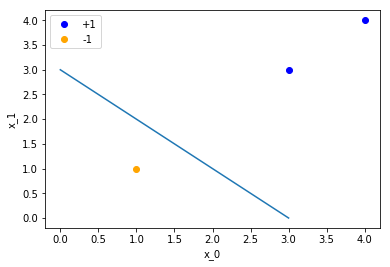

In [6]:
# Plot the line
# randomly initialize ten points in range (4, 7) for the line
# the function np.linspace(start, end, n): return n numbers equally spaced samples in the closed interval [start, stop]
x_ = np.linspace(0, 3, 10)
# the line w * x = 0, x_2 = 1, so w_0 * x_0 + w_1 * x_1 + w_2 * x_2 = 0, here y is x_1
y_ = -(perceptron.w[2]*1 + perceptron.w[0]*x_)/perceptron.w[1]
plt.plot(x_, y_)
plt.plot([3,4], [3,4], 'bo', color='blue', label='+1')
plt.plot([1], [1], 'bo', color='orange', label='-1')
plt.xlabel('x_0')
plt.ylabel('x_1')
plt.legend()

### 4. Test Iris dataset:
use the iris dataset to do binary classification

#### 1). import package

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

#### 2). load iris into pandas dataframe, set features and label

Iris is a dataset with the method `data` and `target`, the shape is (150, 5). <br>
The `data` has four columns 0 to 3, referring to four features 'sepal length', 'sepal width', 'petal length', 'petal width', 'label'. (Here we need to transfer column names to real meanings and only use two features 0 and 1.)<br>
The `target` has three categories 0, 1, 2, from \[:50\], \[50:100\], \[100:\]. (Here we only use two categories 0 and 1.)

In [8]:
iris = load_iris()
# create dataframe from iris feature set
df = pd.DataFrame(iris.data)
# set columns label to iris target set
df['label'] = iris.target
# set columns 0,1,2,3 to real column meaning
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

In [9]:
# describe dataframe
df.describe()

,sepal length,sepal width,petal length,petal width,label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# describe label
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

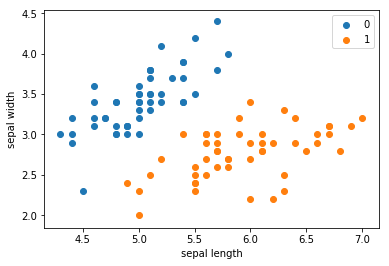

In [11]:
# plot two labels 0 and 1 with feature 'sepal length' and 'sepal width'
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label ='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label = '1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [12]:
# choose 100 rows for training, choose column 0, 1, -1 with feature 0, 1 and label value 0 in [:50], value 1 in [50:100]
data = np.array(df.iloc[:100, [0, 1, -1]])

In [13]:
# print shape
data.shape

(100, 3)

In [14]:
# split into feature and label 
x, y = data[:,:-1], data[:, -1]

In [15]:
# add x_0 as 1, x.shape = (100, 3)
x = np.c_[x, np.ones(len(data))]  # or : x = np.column_stack((np.ones(len(data)),x)

In [16]:
# change y into two categories 1:-1 for calculation
y = np.array([1 if i==1 else -1 for i in y])

#### 3). Test

In [17]:
# initialize a model variable and fit the data
perceptron = PerceptronModel(x, 0.1)
perceptron.fit(x, y)

Time 1, update point (x [5.1 3.5 1. ], y -1) with w [0. 0. 0.]
, now w is [-0.51 -0.35 -0.1 ]
Time 2, update point (x [7.  3.2 1. ], y 1) with w [-0.51 -0.35 -0.1 ]
, now w is [ 0.19 -0.03  0.  ]
Time 3, update point (x [5.1 3.5 1. ], y -1) with w [ 0.19 -0.03  0.  ]
, now w is [-0.32 -0.38 -0.1 ]
Time 4, update point (x [7.  3.2 1. ], y 1) with w [-0.32 -0.38 -0.1 ]
, now w is [ 0.38 -0.06  0.  ]
Time 5, update point (x [5.1 3.5 1. ], y -1) with w [ 0.38 -0.06  0.  ]
, now w is [-0.13 -0.41 -0.1 ]
Time 6, update point (x [7.  3.2 1. ], y 1) with w [-0.13 -0.41 -0.1 ]
, now w is [ 0.57 -0.09  0.  ]
Time 7, update point (x [5.1 3.5 1. ], y -1) with w [ 0.57 -0.09  0.  ]
, now w is [ 0.06 -0.44 -0.1 ]
Time 8, update point (x [7.  3.2 1. ], y 1) with w [ 0.06 -0.44 -0.1 ]
, now w is [ 0.76 -0.12  0.  ]
Time 9, update point (x [5.1 3.5 1. ], y -1) with w [ 0.76 -0.12  0.  ]
, now w is [ 0.25 -0.47 -0.1 ]
Time 10, update point (x [6.4 3.2 1. ], y 1) with w [ 0.25 -0.47 -0.1 ]
, now w is [ 0

In [18]:
perceptron.score(x, y)

tp_tn : 100 / 100


1.0

#### 4). Output the line and plot the classification effect

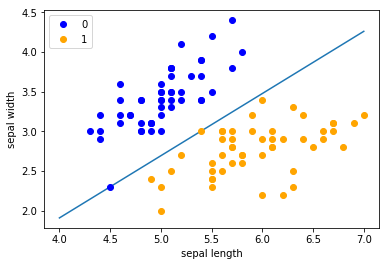

In [19]:
# Plot the line
# randomly initialize ten points in range (4, 7) for the line
# the function np.linspace(start, end, n): return n numbers equally spaced samples in the closed interval [start, stop]
x_ = np.linspace(4, 7, 10)
# the line w * x = 0, x_2 = 1, so w_0 * x_0 + w_1 * x_1 + w_2 * x_2 = 0, here y is x_1
y_ = -(perceptron.w[2]*1 + perceptron.w[0]*x_)/perceptron.w[1]
plt.plot(x_, y_)
plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()